In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import itertools 
import scipy 
from sklearn import datasets 
from sklearn import cluster 
from sklearn.neighbors import kneighbors_graph 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn import metrics 
import time 

In [3]:
faces=datasets.olivetti_faces.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Pranta Das\scikit_learn_data


In [4]:
faces.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

In [6]:
faces_image=faces["images"]  # image data
faces_data=faces.data   # After converting image to a vector , data matrix

In [15]:
faces_image.shape

(400, 64, 64)

In [16]:
faces_data.shape

(400, 4096)

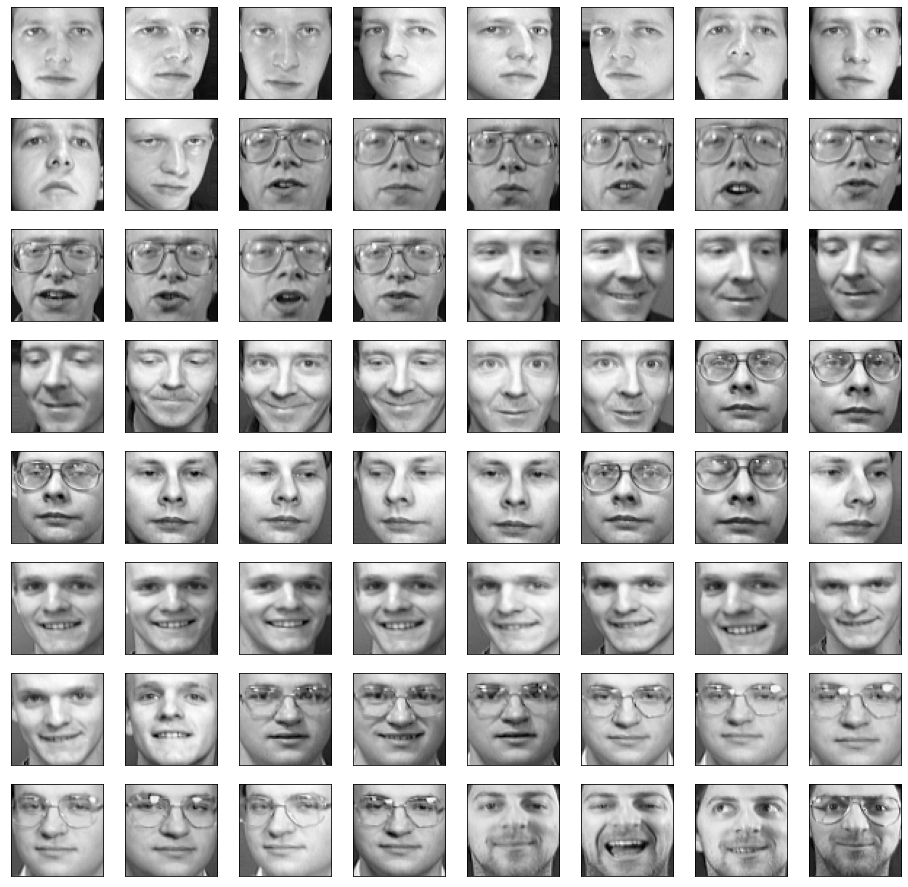

In [18]:
plt.figure(figsize=(16,16))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(faces_image[i],cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [20]:
n_eigenfaces=16 
pca=PCA(n_components=n_eigenfaces,whiten=True)
pca.fit(faces_data)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [21]:
pca.components_.shape

(16, 4096)

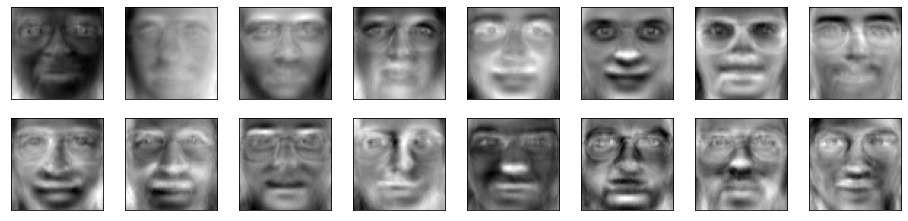

In [22]:
plt.figure(figsize=(16,16))
for i in range(pca.components_.shape[0]):
    plt.subplot(8,8,i+1)
    plt.imshow(pca.components_[i].reshape(64,64),cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.show()

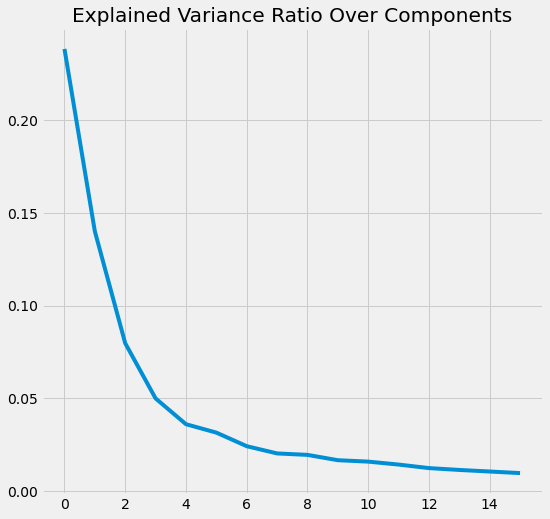

In [26]:
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(8,8))
    plt.title("Explained Variance Ratio Over Components")
    plt.plot(pca.explained_variance_ratio_)

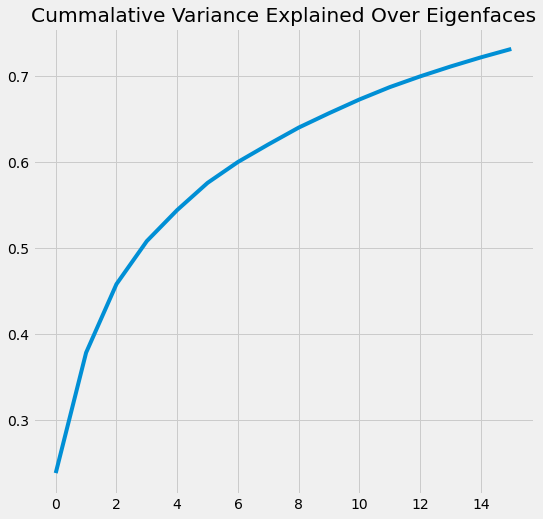

In [27]:
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(8,8))
    plt.title("Cummalative Variance Explained Over Eigenfaces")
    plt.plot(pca.explained_variance_ratio_.cumsum())

In [29]:
pca.explained_variance_ratio_.sum()*100

73.10051321983337

In [30]:
n_eigenfaces=121
pca=PCA(n_components=n_eigenfaces,whiten=True)
pca.fit(faces_data)

PCA(copy=True, iterated_power='auto', n_components=121, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

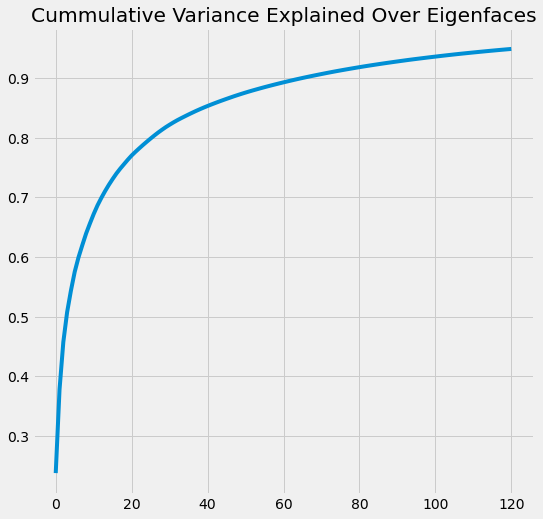

In [31]:
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(8,8))
    plt.title("Cummulative Variance Explained Over Eigenfaces")
    plt.plot(pca.explained_variance_ratio_.cumsum())

In [32]:
pca.explained_variance_ratio_.sum()*100

94.88681554794312

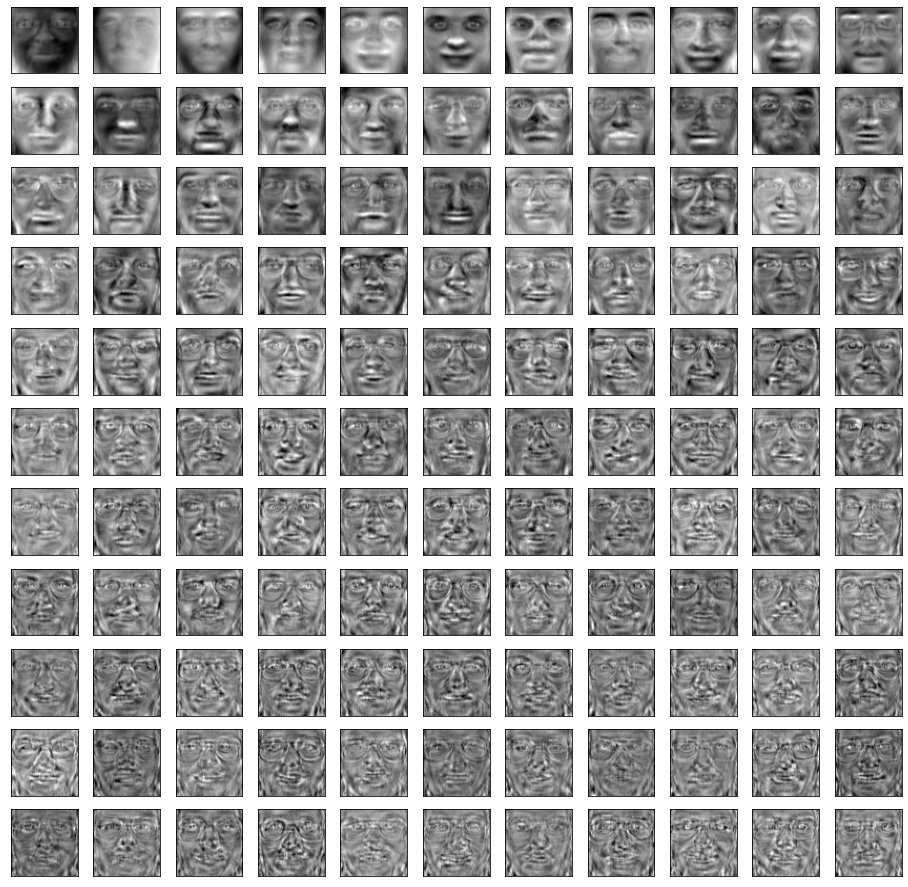

In [35]:
plt.figure(figsize=(16,16))
for i in range(pca.components_.shape[0]):
    plt.subplot(11,11,i+1)
    plt.imshow(pca.components_[i].reshape(64,64),cmap=plt.cm.gray)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.show()